In [409]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt



In [410]:
data= 'total_data_na.csv'
df= pd.read_csv(data)
df

,PLAYER,Mat.x,Inns.x,NO,Runs.x,HS,Avg.x,BF,SR.x,X100,...,Ov,Runs.y,Wkts,BBI,Avg.y,Econ,SR.y,X4w,X5w,y
0,Aaron Finch,10,9,1,134,46,16.75,100,134.00,0,...,0.0,0,0,0,0,0.00,0,0,0,0
1,AB de Villiers,12,11,2,480,90,53.33,275,174.54,0,...,0.0,0,0,0,0,0.00,0,0,0,0
2,Abhishek Sharma,3,3,2,63,46,63,33,190.90,0,...,0.0,0,0,0,0,0.00,0,0,0,0
3,Ajinkya Rahane,15,14,1,370,65,28.46,313,118.21,0,...,0.0,0,0,0,0,0.00,0,0,0,0
4,Alex Hales,6,6,0,148,45,24.66,118,125.42,0,...,0.0,0,0,0,0,0.00,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,Siddarth Kaul,0,0,0,0,0,0,0,0.00,0,...,66.0,547,21,0,26.04,8.28,18.85,0,0,0
139,Trent Boult,0,0,0,0,0,0,0,0.00,0,...,52.4,466,18,0,25.88,8.84,17.55,0,0,0
140,Umesh Yadav,0,0,0,0,0,0,0,0.00,0,...,53.1,418,20,0,20.9,7.86,15.95,0,0,0
141,Vi0y Kumar,0,0,0,0,0,0,0,0.00,0,...,3.5,65,2,0,32.5,16.95,11.5,0,0,0


In [411]:
df.drop_duplicates(inplace=True)
df

,PLAYER,Mat.x,Inns.x,NO,Runs.x,HS,Avg.x,BF,SR.x,X100,...,Ov,Runs.y,Wkts,BBI,Avg.y,Econ,SR.y,X4w,X5w,y
0,Aaron Finch,10,9,1,134,46,16.75,100,134.00,0,...,0.0,0,0,0,0,0.00,0,0,0,0
1,AB de Villiers,12,11,2,480,90,53.33,275,174.54,0,...,0.0,0,0,0,0,0.00,0,0,0,0
2,Abhishek Sharma,3,3,2,63,46,63,33,190.90,0,...,0.0,0,0,0,0,0.00,0,0,0,0
3,Ajinkya Rahane,15,14,1,370,65,28.46,313,118.21,0,...,0.0,0,0,0,0,0.00,0,0,0,0
4,Alex Hales,6,6,0,148,45,24.66,118,125.42,0,...,0.0,0,0,0,0,0.00,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,Siddarth Kaul,0,0,0,0,0,0,0,0.00,0,...,66.0,547,21,0,26.04,8.28,18.85,0,0,0
139,Trent Boult,0,0,0,0,0,0,0,0.00,0,...,52.4,466,18,0,25.88,8.84,17.55,0,0,0
140,Umesh Yadav,0,0,0,0,0,0,0,0.00,0,...,53.1,418,20,0,20.9,7.86,15.95,0,0,0
141,Vi0y Kumar,0,0,0,0,0,0,0,0.00,0,...,3.5,65,2,0,32.5,16.95,11.5,0,0,0


In [412]:
new_df=df

In [413]:
# Encode the categorical column 'Gender'
# new_df=df
encoder = LabelEncoder()
gender_encoded = encoder.fit_transform(df['PLAYER'])
df['PLAYER'] = gender_encoded
# new_df
#df

In [414]:
df.dropna

<bound method DataFrame.dropna of      PLAYER  Mat.x  Inns.x  NO  Runs.x  HS  Avg.x   BF    SR.x  X100  ...  \
0         1     10       9   1     134  46  16.75  100  134.00     0  ...   
1         0     12      11   2     480  90  53.33  275  174.54     0  ...   
2         2      3       3   2      63  46     63   33  190.90     0  ...   
3         3     15      14   1     370  65  28.46  313  118.21     0  ...   
4         5      6       6   0     148  45  24.66  118  125.42     0  ...   
..      ...    ...     ...  ..     ...  ..    ...  ...     ...   ...  ...   
138     126      0       0   0       0   0      0    0    0.00     0  ...   
139     133      0       0   0       0   0      0    0    0.00     0  ...   
140     134      0       0   0       0   0      0    0    0.00     0  ...   
141     135      0       0   0       0   0      0    0    0.00     0  ...   
142     142      0       0   0       0   0      0    0    0.00     0  ...   

       Ov  Runs.y  Wkts  BBI  Avg.y   Eco

In [415]:
df.replace('-', np.nan, inplace=True)

In [416]:
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df

,PLAYER,Mat.x,Inns.x,NO,Runs.x,HS,Avg.x,BF,SR.x,X100,...,Ov,Runs.y,Wkts,BBI,Avg.y,Econ,SR.y,X4w,X5w,y
0,1.0,10.0,9.0,1.0,134.0,46.0,16.75,100.0,134.00,0.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0
1,0.0,12.0,11.0,2.0,480.0,90.0,53.33,275.0,174.54,0.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0
2,2.0,3.0,3.0,2.0,63.0,46.0,63.00,33.0,190.90,0.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0
3,3.0,15.0,14.0,1.0,370.0,65.0,28.46,313.0,118.21,0.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0
4,5.0,6.0,6.0,0.0,148.0,45.0,24.66,118.0,125.42,0.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,126.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,...,66.0,547.0,21.0,0.0,26.04,8.28,18.85,0.0,0.0,0.0
139,133.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,...,52.4,466.0,18.0,0.0,25.88,8.84,17.55,0.0,0.0,0.0
140,134.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,...,53.1,418.0,20.0,0.0,20.90,7.86,15.95,0.0,0.0,0.0
141,135.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,...,3.5,65.0,2.0,0.0,32.50,16.95,11.50,0.0,0.0,0.0


In [417]:
df.fillna(df.mean())

,PLAYER,Mat.x,Inns.x,NO,Runs.x,HS,Avg.x,BF,SR.x,X100,...,Ov,Runs.y,Wkts,BBI,Avg.y,Econ,SR.y,X4w,X5w,y
0,1.0,10.0,9.0,1.0,134.0,46.0,16.75,100.0,134.00,0.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0
1,0.0,12.0,11.0,2.0,480.0,90.0,53.33,275.0,174.54,0.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0
2,2.0,3.0,3.0,2.0,63.0,46.0,63.00,33.0,190.90,0.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0
3,3.0,15.0,14.0,1.0,370.0,65.0,28.46,313.0,118.21,0.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0
4,5.0,6.0,6.0,0.0,148.0,45.0,24.66,118.0,125.42,0.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,126.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,...,66.0,547.0,21.0,0.0,26.04,8.28,18.85,0.0,0.0,0.0
139,133.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,...,52.4,466.0,18.0,0.0,25.88,8.84,17.55,0.0,0.0,0.0
140,134.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,...,53.1,418.0,20.0,0.0,20.90,7.86,15.95,0.0,0.0,0.0
141,135.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,...,3.5,65.0,2.0,0.0,32.50,16.95,11.50,0.0,0.0,0.0


In [418]:
# K-means clustering
kmeans = KMeans(n_clusters=3, n_init=10, max_iter=300, random_state=0)
kmeans.fit(df)
identified_clusters = kmeans.predict(df)

In [419]:

# Centroids
centroids = kmeans.cluster_centers_
print("Centroids:")
print(centroids)

Centroids:
[[ 7.87857143e+01  1.43214286e+01  1.39285714e+01  2.10714286e+00
   4.36464286e+02  7.87857143e+01  3.78939286e+01  3.06250000e+02
   1.41722143e+02  1.78571429e-01  3.03571429e+00  3.95000000e+01
   1.96785714e+01  1.60714286e+00  6.07142857e-01  1.28928571e+00
   1.10357143e+01  3.92857143e-01  0.00000000e+00  2.38678571e+00
   8.24642857e-01  1.75892857e+00 -3.46944695e-17 -4.33680869e-18
   0.00000000e+00]
 [ 7.39772727e+01  7.70454545e+00  4.65909091e+00  1.36363636e+00
   5.90909091e+01  1.81818182e+01  9.33290584e+00  4.20227273e+01
   7.89511364e+01 -2.08166817e-17  1.13636364e-01  4.70454545e+00
   3.04545455e+00  1.20227273e+01  1.18409091e+01  4.06863636e+01
   3.38818182e+02  1.18181818e+01  0.00000000e+00  3.40054545e+01
   8.47431818e+00  2.36811364e+01  1.59090909e-01  2.27272727e-02
   0.00000000e+00]
 [ 6.60845070e+01  4.25352113e+00  3.73239437e+00  8.45070423e-01
   5.78169014e+01  2.44366197e+01  1.43351962e+01  4.45774648e+01
   8.27342254e+01 -2.081668

In [420]:
# Getting the labels assigned to each data point
labels = kmeans.labels_
print("\nLabels:")
print(labels)



Labels:
[2 0 2 0 2 0 1 1 1 2 1 1 2 2 0 0 2 2 2 2 2 2 2 2 1 2 0 1 0 2 2 2 1 1 2 2 0
 2 1 1 0 2 0 0 2 2 1 1 0 2 2 0 0 2 2 2 1 1 2 2 1 0 0 2 1 0 2 2 2 1 1 1 2 0
 0 0 2 0 2 1 0 1 0 1 2 1 0 2 2 1 0 0 1 2 2 0 2 2 0 2 2 1 1 2 2 1 1 2 1 2 2
 2 2 2 2 1 2 2 2 2 2 1 2 1 2 2 1 2 1 1 2 1 2 2 1 2 1 2 1 1 1 2 1]


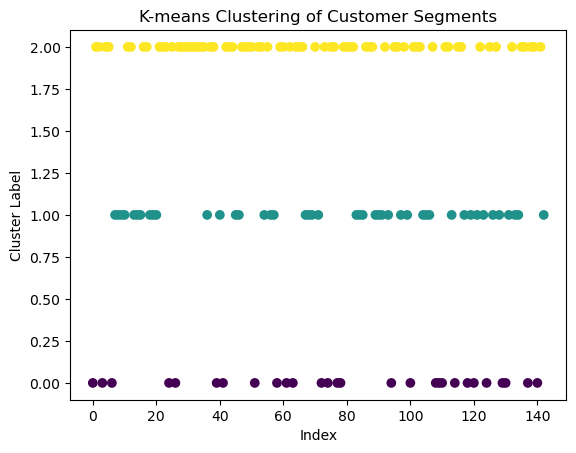

In [421]:
# Visualize the resulting clusters
plt.scatter(df['PLAYER'], labels, c=labels, cmap='viridis')
plt.xlabel('Index')
plt.ylabel('Cluster Label')
plt.title('K-means Clustering of Customer Segments')
plt.show()




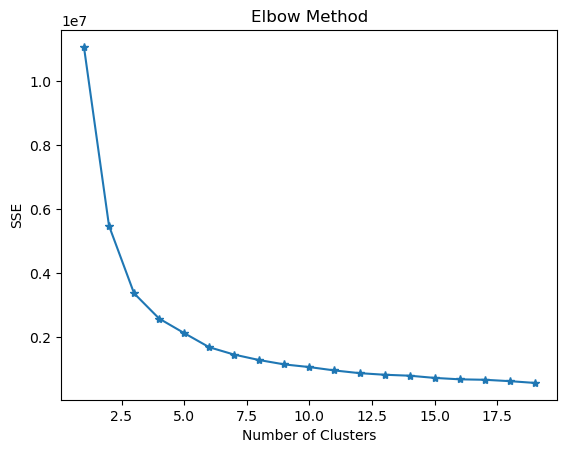

In [422]:
# Elbow Method to determine the optimal number of clusters
# sse = []
# for k in range(1, 20):
#     kmeans = KMeans(n_clusters=k,n_init=10, max_iter=300, random_state=0)
#     kmeans.fit(df)
#     sse.append(kmeans.inertia_)
# number_clusters = range(1,20)
# plt.title('Elbow Method')
# plt.xlabel('Number of Clusters')
# plt.ylabel('SSE')
# plt.show()



sse = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=300, random_state=0)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 20), sse, marker='*')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()




In [423]:
kmeans = KMeans(n_clusters = 4, random_state=42, n_init= 100)


kmeans.fit(df)

centroids = kmeans.cluster_centers_
identified_clusters = kmeans.fit_predict(df)

df['Cluster'] = identified_clusters

num_top_order = 2
num_middle_order = 4
num_all_rounders = 2
num_bowlers = 4


In [431]:
top_order = df[df['Cluster'] == 0]
middle_order = df[df['Cluster'] == 1]
all_rounders = df[df['Cluster'] == 2]
bowlers = df[df['Cluster'] == 3]

print("Top Order Batsmen:")
print(df.loc[:2])
print("\nMiddle Order Batsmen:")
print(df.loc[:3])
print("\nAll Rounders:")
print(df.loc[:3])
print("\nBowlers:")
print(df.loc[:4])

Top Order Batsmen:
   PLAYER  Mat.x  Inns.x   NO  Runs.x    HS  Avg.x     BF    SR.x  X100  ...  \
0     1.0   10.0     9.0  1.0   134.0  46.0  16.75  100.0  134.00   0.0  ...   
1     0.0   12.0    11.0  2.0   480.0  90.0  53.33  275.0  174.54   0.0  ...   
2     2.0    3.0     3.0  2.0    63.0  46.0  63.00   33.0  190.90   0.0  ...   

   Runs.y  Wkts  BBI  Avg.y  Econ  SR.y  X4w  X5w    y  Cluster  
0     0.0   0.0  0.0    0.0   0.0   0.0  0.0  0.0  0.0        0  
1     0.0   0.0  0.0    0.0   0.0   0.0  0.0  0.0  0.0        2  
2     0.0   0.0  0.0    0.0   0.0   0.0  0.0  0.0  0.0        0  

[3 rows x 26 columns]

Middle Order Batsmen:
   PLAYER  Mat.x  Inns.x   NO  Runs.x    HS  Avg.x     BF    SR.x  X100  ...  \
0     1.0   10.0     9.0  1.0   134.0  46.0  16.75  100.0  134.00   0.0  ...   
1     0.0   12.0    11.0  2.0   480.0  90.0  53.33  275.0  174.54   0.0  ...   
2     2.0    3.0     3.0  2.0    63.0  46.0  63.00   33.0  190.90   0.0  ...   
3     3.0   15.0    14.0  1.0 